In [ ]:
#установим нужные библиотеки
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
from requests import get

In [ ]:
!pip3 install lxml

In [ ]:
from typing import List

In [ ]:
!pip install beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
##сохраним ссылку в переменной
page_link='https://ru.tradingeconomics.com/'

In [ ]:
response = get(page_link)#с помощью метода get сделаем запрос к ссылке
response

<Response [403]>

In [ ]:
response.request.headers #проверим информацию,какой запрос мы послали и как выглядел финальный запрос

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [ ]:
#установим нужные пакеты
!pip install fake_useragent
from fake_useragent import UserAgent

In [ ]:
UserAgent().chrome #библиотка генерирует спецификации, связанные с операционной системой

'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'

In [ ]:
response = get(page_link, headers={'User-Agent':UserAgent().chrome})#с помощью метода get сделаем запрос к ссылке
response

<Response [200]>

In [ ]:
html = response.content# вытаскиваем html код страницы  инф
html

b'\r\n<!doctype html>\r\n<html lang="ru" xml:lang="ru">\r\n<head id="ctl00_Head1"><meta charset="utf-8" /><title>\r\n\t\xd0\xad\xd0\x9a\xd0\x9e\xd0\x9d\xd0\x9e\xd0\x9c\xd0\x98\xd0\xa7\xd0\x95\xd0\xa1\xd0\x9a\xd0\x98\xd0\x95 \xd0\x9f\xd0\x9e\xd0\x9a\xd0\x90\xd0\x97\xd0\x90\xd0\xa2\xd0\x95\xd0\x9b\xd0\x98 | RU | TRADINGECONOMICS.COM\r\n</title><meta id="metaDesc" name="description" content="\xd0\x94\xd0\xb0\xd0\xbd\xd0\xbd\xd1\x8b\xd0\xb5 - \xd0\x9f\xd1\x80\xd0\xbe\xd0\xb3\xd0\xbd\xd0\xbe\xd0\xb7\xd1\x8b - \xd0\x9a\xd0\xb0\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb4\xd0\xb0\xd1\x80\xd1\x8c -  - \xd0\xad\xd0\x9a\xd0\x9e\xd0\x9d\xd0\x9e\xd0\x9c\xd0\x98\xd0\xa7\xd0\x95\xd0\xa1\xd0\x9a\xd0\x98\xd0\x95 \xd0\x9f\xd0\x9e\xd0\x9a\xd0\x90\xd0\x97\xd0\x90\xd0\xa2\xd0\x95\xd0\x9b\xd0\x98 - RU - TRADINGECONOMICS.COM - 11/14/2024" /><meta id="metaKeyword" name="keywords" content="\xd0\x94\xd0\xb0\xd0\xbd\xd0\xbd\xd1\x8b\xd0\xb5 , \xd0\x9f\xd1\x80\xd0\xbe\xd0\xb3\xd0\xbd\xd0\xbe\xd0\xb7\xd1\x8b , \xd0\x9a\xd0\xb0

In [ ]:
soup = BeautifulSoup(html, 'html.parser')#Beautiful Soup сделает дерево
soup


<!DOCTYPE html>

<html lang="ru" xml:lang="ru">
<head id="ctl00_Head1"><meta charset="utf-8"/><title>
	ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ | RU | TRADINGECONOMICS.COM
</title><meta content="Данные - Прогнозы - Календарь -  - ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ - RU - TRADINGECONOMICS.COM - 11/14/2024" id="metaDesc" name="description"/><meta content="Данные , Прогнозы , Календарь ,  , ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ , RU , TRADINGECONOMICS.COM , 11/14/2024" id="metaKeyword" name="keywords"/><meta clienstidmode="Static" content="ru" id="ctl00_metaLanguage" name="content-language"/><meta content="width=device-width,minimum-scale=1,initial-scale=1,maximum-scale=1" name="viewport"/><meta content="#333333" name="theme-color"/>
<link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.2.3/css/bootstrap.min.css" integrity="sha512-SbiR/eusphKoMVVXysTKG/7VseWii+Y3FdHrt0EpKgpToZeemhqHeZeLWLhJutz/2ut2Vw1uQEj2MbRF+TVBUA==" referrerpolicy="no-referrer" rel="stylesheet"/>
<link crossorigin="anonymou

In [ ]:
soup.html.head.title#внутри soup найдем тэг html, потом найдет тэг head, потом тэг title

<title>
	ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ | RU | TRADINGECONOMICS.COM
</title>

In [ ]:
v = soup.html.head.title.text.replace('\r\n',' ')
v.replace('\t',' ')

'  ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ | RU | TRADINGECONOMICS.COM '

In [ ]:
tabs = pd.read_html("https://ru.tradingeconomics.com/")#подгружаем данные,где находится таблица

HTTPError: HTTP Error 405: Not Allowed

In [ ]:
len(tabs) #всего на этой странице было найдено 21 HTML-таблицы.

In [ ]:
tabs = pd.read_html("https://ru.tradingeconomics.com/",match = 'ВВП')#используем аргумент match , чтобы получить только HTML-таблицы, содержащие это слово

In [ ]:
len(tabs) #1 HTML-таблицa

In [ ]:
#перечисляем имена столбцов-таблицы
df = tabs[0]
list(df)

[('СТРАНЫ'),('ВВП'),('ТЕМПЫ РОСТА ВВП'),
('ПРОЦЕНТНАЯ СТАВКА'), ('УРОВЕНЬ ИНФЛЯЦИИ'),
('УРОВЕНЬ БЕЗРАБОТИЦЫ'), ('БЮДЖЕТ ОТ ВВП'),
('ДОЛГ / ВВП'), ('СЧЕТ ТЕКУЩИХ ОПЕРАЦИЙ'),
('НAСЕЛЕНИЕ')]

['СТРАНЫ',
 'ВВП',
 'ТЕМПЫ РОСТА ВВП',
 'ПРОЦЕНТНАЯ СТАВКА',
 'УРОВЕНЬ ИНФЛЯЦИИ',
 'УРОВЕНЬ БЕЗРАБОТИЦЫ',
 'БЮДЖЕТ ОТ ВВП',
 'ДОЛГ / ВВП',
 'СЧЕТ ТЕКУЩИХ ОПЕРАЦИЙ',
 'НAСЕЛЕНИЕ']

In [ ]:
#отфильтруем DataFrame, чтобы он содержал только эти столбцы:
df_final = df.iloc [:, 0:6]
df_final. columns = ['СТРАНЫ','ВВП','ТЕМПЫ_РОСТА_ВВП','ПРОЦЕНТНАЯ_СТАВКА','УРОВЕНЬ_ИНФЛЯЦИИ','УРОВЕНЬ_БЕЗРАБОТИЦЫ']

print(df_final)

               СТРАНЫ    ВВП  ТЕМПЫ_РОСТА_ВВП  ПРОЦЕНТНАЯ_СТАВКА  \
0   Соединенные Штаты  25463              2.1               5.50   
1               Китай  17963              0.8               3.45   
2           Зона евро  14041              0.1               4.50   
3              Япония   4231              1.2              -0.10   
4            Германия   4072              0.0               4.50   
5               Индия   3385              1.9               6.50   
6      Великобритания   3071              0.2               5.25   
7             Франция   2783              0.5               4.50   
8              Россия   2240             -0.8              13.00   
9              Канада   2140              0.0               5.00   
10             Италия   2010             -0.4               4.50   
11           Бразилия   1920              0.9              12.75   
12          Австралия   1675              0.4               4.10   

    УРОВЕНЬ_ИНФЛЯЦИИ  УРОВЕНЬ_БЕЗРАБОТИЦЫ  
0  

In [ ]:
print(df_final.shape)#13 строк и 6 столбцов

(13, 6)


In [ ]:
df_final.dtypes#узнаем тип каждого столбца

СТРАНЫ                  object
ВВП                      int64
ТЕМПЫ_РОСТА_ВВП        float64
ПРОЦЕНТНАЯ_СТАВКА      float64
УРОВЕНЬ_ИНФЛЯЦИИ       float64
УРОВЕНЬ_БЕЗРАБОТИЦЫ    float64
dtype: object

Найдем максимум по каждому столбцу и страну, которая обладает этим максимум по экономическим показателям

In [ ]:
df_final.max()[1:]

ВВП                    25463
ТЕМПЫ_РОСТА_ВВП          2.1
ПРОЦЕНТНАЯ_СТАВКА       13.0
УРОВЕНЬ_ИНФЛЯЦИИ        6.83
УРОВЕНЬ_БЕЗРАБОТИЦЫ      8.0
dtype: object

In [ ]:
mx = df_final.ВВП.max()
df_final[df_final.ВВП == mx]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
0,Соединенные Штаты,25463,2.1,5.5,3.7,3.8


In [ ]:
mx = df_final.ТЕМПЫ_РОСТА_ВВП.max()
df_final[df_final.ТЕМПЫ_РОСТА_ВВП == mx]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
0,Соединенные Штаты,25463,2.1,5.5,3.7,3.8


In [ ]:
mx = df_final.ПРОЦЕНТНАЯ_СТАВКА.max()
df_final[df_final.ПРОЦЕНТНАЯ_СТАВКА == mx]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
8,Россия,2240,-0.8,13.0,5.2,3.0


In [ ]:
mx = df_final.УРОВЕНЬ_ИНФЛЯЦИИ.max()
df_final[df_final.УРОВЕНЬ_ИНФЛЯЦИИ == mx]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
5,Индия,3385,1.9,6.5,6.83,8.0


In [ ]:
mx = df_final.УРОВЕНЬ_БЕЗРАБОТИЦЫ.max()
df_final[df_final.УРОВЕНЬ_БЕЗРАБОТИЦЫ == mx]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
5,Индия,3385,1.9,6.5,6.83,8.0


ВЫВОД: Таким образом ВВП Соединенных Штатов является самым высоким, как и темпы роста ВВП.
Самой высокой процентной ставкой-13% обладает Россия. Высокий уровень инфляции и уровень безработицы имеет Индия

Найдем минимум по каждому столбцу и страну, которая обладает этим минимумом по экономическим показателям

In [ ]:
df_final.min()[1:]#минимум по каждому столбцу

ВВП                    1675
ТЕМПЫ_РОСТА_ВВП        -0.8
ПРОЦЕНТНАЯ_СТАВКА      -0.1
УРОВЕНЬ_ИНФЛЯЦИИ        0.1
УРОВЕНЬ_БЕЗРАБОТИЦЫ     2.7
dtype: object

In [ ]:
mn = df_final.ВВП.min()
df_final[df_final.ВВП == mn]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
12,Австралия,1675,0.4,4.1,6.0,3.7


In [ ]:
mn = df_final.ТЕМПЫ_РОСТА_ВВП.min()
df_final[df_final.ТЕМПЫ_РОСТА_ВВП == mn]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
8,Россия,2240,-0.8,13.0,5.2,3.0


In [ ]:
mn = df_final.ПРОЦЕНТНАЯ_СТАВКА.min()
df_final[df_final.ПРОЦЕНТНАЯ_СТАВКА == mn]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
3,Япония,4231,1.2,-0.1,3.2,2.7


In [ ]:
mn = df_final.УРОВЕНЬ_ИНФЛЯЦИИ.min()
df_final[df_final.УРОВЕНЬ_ИНФЛЯЦИИ == mn]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
1,Китай,17963,0.8,3.45,0.1,5.2


In [ ]:
mn = df_final.УРОВЕНЬ_БЕЗРАБОТИЦЫ.min()
df_final[df_final.УРОВЕНЬ_БЕЗРАБОТИЦЫ == mn]

,СТРАНЫ,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
3,Япония,4231,1.2,-0.1,3.2,2.7


ВЫВОД: Австралия имеет из всех представленных стран самое низкое ВВП. А самый низкий рост ВВП у России. Отрицательная ставка наблюдается у Японии, как и уровень безработицы - 2,7. Самый низкий уровень инфляции у Китая.

In [ ]:
df_final.mean()#среднее по каждому столбцу

C:\Users\user\AppData\Local\Temp\ipykernel_5684\3641365330.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.mean()#среднее по каждому столбцу


ВВП                    6538.000000
ТЕМПЫ_РОСТА_ВВП           0.530769
ПРОЦЕНТНАЯ_СТАВКА         5.650000
УРОВЕНЬ_ИНФЛЯЦИИ          4.564615
УРОВЕНЬ_БЕЗРАБОТИЦЫ       5.453846
dtype: float64

In [ ]:
df_final.median()#медиана по каждому столбцу

C:\Users\user\AppData\Local\Temp\ipykernel_5684\541365828.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.median()#медиана по каждому столбцу


ВВП                    3071.00
ТЕМПЫ_РОСТА_ВВП           0.40
ПРОЦЕНТНАЯ_СТАВКА         4.50
УРОВЕНЬ_ИНФЛЯЦИИ          4.61
УРОВЕНЬ_БЕЗРАБОТИЦЫ       5.50
dtype: float64

ВЫВОД: Среднее и медиана отражают типичное значение, если в выборке нет выбросов они примерно совпадают.
Среднее чувствительно к выбросам в данных, а  медиана нет, таким образом ВВП из-за выбросов сильно исказит среднее. ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ примерно совпадают

Медиана сильно отличается от среднего это происходит из-за выбросов, характеризующихся очень длинным хвостом распределения.
Посмотрим на примере ВВП

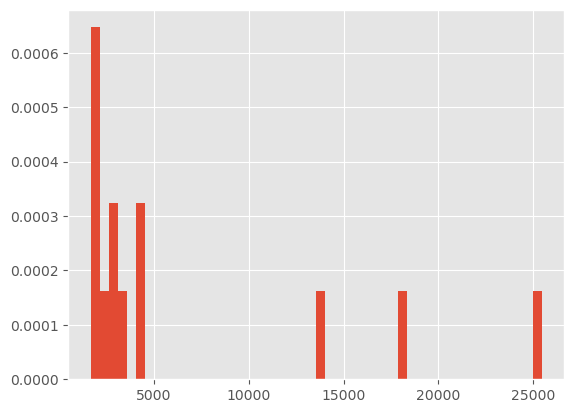

In [ ]:
df_final.ВВП.hist(bins=50, density=True);

Теперь можно увидеть насколько в данных сильный разброс от типичного значения.

In [ ]:
df_final.var(ddof = 0)#дисперсия

C:\Users\user\AppData\Local\Temp\ipykernel_5684\4227027059.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.var(ddof = 0)#дисперсия


ВВП                    5.351837e+07
ТЕМПЫ_РОСТА_ВВП        6.544379e-01
ПРОЦЕНТНАЯ_СТАВКА      1.164269e+01
УРОВЕНЬ_ИНФЛЯЦИИ       2.749748e+00
УРОВЕНЬ_БЕЗРАБОТИЦЫ    3.185562e+00
dtype: float64

In [ ]:
df_final.var(ddof=1)#несмещенный вариант дисперсии

C:\Users\user\AppData\Local\Temp\ipykernel_5684\3957856650.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.var(ddof=1)#несмещенный вариант дисперсии


ВВП                    5.797824e+07
ТЕМПЫ_РОСТА_ВВП        7.089744e-01
ПРОЦЕНТНАЯ_СТАВКА      1.261292e+01
УРОВЕНЬ_ИНФЛЯЦИИ       2.978894e+00
УРОВЕНЬ_БЕЗРАБОТИЦЫ    3.451026e+00
dtype: float64

Дисперсия измеряется в квадратных величинах, поэтому можем найти стандартное отклонение
Стандартное отклонение характеризует степень отклонения данных от среднего значения

In [ ]:
df_final.std(ddof=0)#стандартное отклонение

C:\Users\user\AppData\Local\Temp\ipykernel_5684\2920159803.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.std(ddof=0)#стандартное отклонение


ВВП                    7315.625385
ТЕМПЫ_РОСТА_ВВП           0.808973
ПРОЦЕНТНАЯ_СТАВКА         3.412139
УРОВЕНЬ_ИНФЛЯЦИИ          1.658236
УРОВЕНЬ_БЕЗРАБОТИЦЫ       1.784814
dtype: float64

In [ ]:
df_final.std(ddof=1)#стандартное отклонение(несмещенный вариант)

C:\Users\user\AppData\Local\Temp\ipykernel_5684\1710365945.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.std(ddof=1)#стандартное отклонение(несмещенный вариант)


ВВП                    7614.344314
ТЕМПЫ_РОСТА_ВВП           0.842006
ПРОЦЕНТНАЯ_СТАВКА         3.551467
УРОВЕНЬ_ИНФЛЯЦИИ          1.725947
УРОВЕНЬ_БЕЗРАБОТИЦЫ       1.857694
dtype: float64

In [ ]:
df_final.quantile(0.99)# 99% стран имеют ВВП, темп роста ВВП, процентную ставку, уровень инфляции, уровень безработицы меньше посчитанного значения по каждому столбцу и у 1% больше, чем посчитанное значение
#Рассмотрим на примере ВВП, 99% стран имеют ВВП меньше, чем 24563.0000 и 1% больше этого значения.

C:\Users\user\AppData\Local\Temp\ipykernel_5684\3974278073.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final.quantile(0.99)# 99% стран имеют ВВП, темп роста ВВП, процентную ставку, уровень инфляции, уровень безработицы меньше посчитанного значения по каждому столбцу и у 1% больше, чем посчитанное значение


ВВП                    24563.0000
ТЕМПЫ_РОСТА_ВВП            2.0760
ПРОЦЕНТНАЯ_СТАВКА         12.9700
УРОВЕНЬ_ИНФЛЯЦИИ           6.8144
УРОВЕНЬ_БЕЗРАБОТИЦЫ        7.9760
Name: 0.99, dtype: float64

In [ ]:
df_final.describe()#посчитаем методом describe все числовые характеристики

,ВВП,ТЕМПЫ_РОСТА_ВВП,ПРОЦЕНТНАЯ_СТАВКА,УРОВЕНЬ_ИНФЛЯЦИИ,УРОВЕНЬ_БЕЗРАБОТИЦЫ
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,6538.000000,0.530769,5.650000,4.564615,5.453846
std,7614.344314,0.842006,3.551467,1.725947,1.857694
min,1675.000000,-0.800000,-0.100000,0.100000,2.700000
25%,2140.000000,0.000000,4.500000,4.000000,3.800000
50%,3071.000000,0.400000,4.500000,4.610000,5.500000
75%,4231.000000,0.900000,5.500000,5.300000,7.200000
max,25463.000000,2.100000,13.000000,6.830000,8.000000
